<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/EDA/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%8A%A4%EC%BF%A8_0531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

선차트
- 시간대별 변화
- 시계열 데이터

바(막대) 차트
- 규모(양) 비교
- 두 개 이상의 불연속 항목

히스토그램 분포
- (모)집단 내의 이벤트 분포
- 두 개 이상의 불연속 항목

파이(부분-전체) 차트
- 전체에서 부분이 차지하는 정도

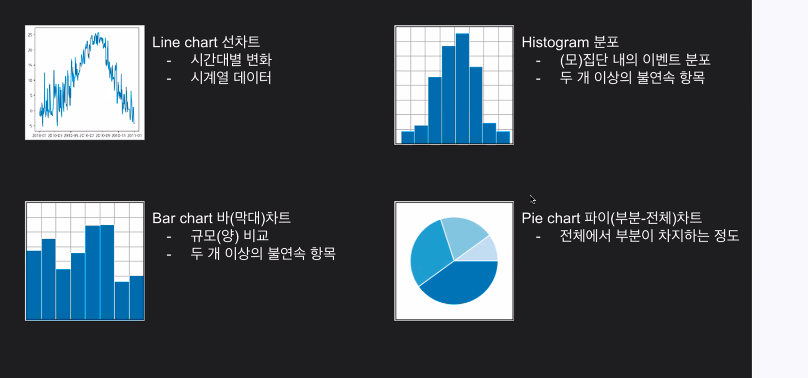

In [5]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 33.9 MB/s eta 0:00:00


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 제주 관광지 데이터

In [157]:
place = pd.read_excel('jeju_place.xlsx')
place.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
1,2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
2,3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
4,5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037


In [ ]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
place.describe()

,순위,검색건수
count,500.000000,500.0000
mean,250.472000,18153.8080
std,144.450064,46217.1129
min,1.000000,1895.0000
25%,125.750000,3565.0000
50%,250.500000,6894.5000
75%,375.250000,14538.2500
max,500.000000,803524.0000


In [158]:
# 순위 칼럼을 인덱스
place = place.set_index('순위')
place.head()

,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,,
1,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037


In [ ]:
# 광역/시도에 제주도만 있는지 확인 -> Drop
place['광역시/도'].unique()

array(['제주특별자치도'], dtype=object)

In [ ]:
place = place.drop('광역시/도', axis=1)
place.head()

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
1,제주국제공항,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
2,동문재래시장,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037


In [ ]:
place.isnull().sum() # null 값 없음

관광지명        0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

In [ ]:
# 중분류 여러개 -> drop X -> 중분류 기준으로 데이터 나눠볼 수 있음
place['중분류 카테고리'].unique()

array(['기타관광', '쇼핑', '자연관광', '문화관광', '레저스포츠', '체험관광', '역사관광'],
      dtype=object)

In [ ]:
mid_cat = place['중분류 카테고리'].value_counts() # 제주도 관광지 검색 중 자연관광 영역이 가장 많이 검색됨
mid_cat

자연관광     138
문화관광     137
기타관광      94
레저스포츠     79
쇼핑        31
역사관광      14
체험관광       7
Name: 중분류 카테고리, dtype: int64

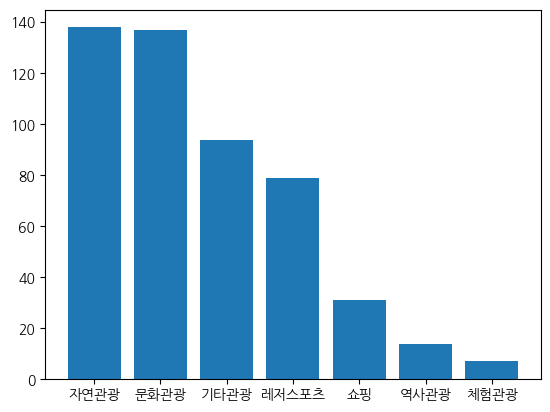

In [ ]:
plt.bar(mid_cat.index, mid_cat)
plt.show()

In [ ]:
low_cat = place['소분류 카테고리'].value_counts()
low_cat

자연경관(하천/해양)    79
기타관광           61
육상레저스포츠        50
전시시설           43
자연경관(산)        38
테마공원           29
도시공원           27
시장             18
데이트코스          18
기타레저스포츠        16
교통시설           15
수상레저스포츠        13
복합관광시설         13
공연시설           12
자연공원           11
역사유적지           9
대형마트            9
기타문화관광지         8
자연관광(산)         8
농/산/어촌체험        6
종교성지            5
면세점             3
랜드마크관광          3
자연생태            2
레저스포츠시설         2
웰니스관광           1
쇼핑몰             1
Name: 소분류 카테고리, dtype: int64

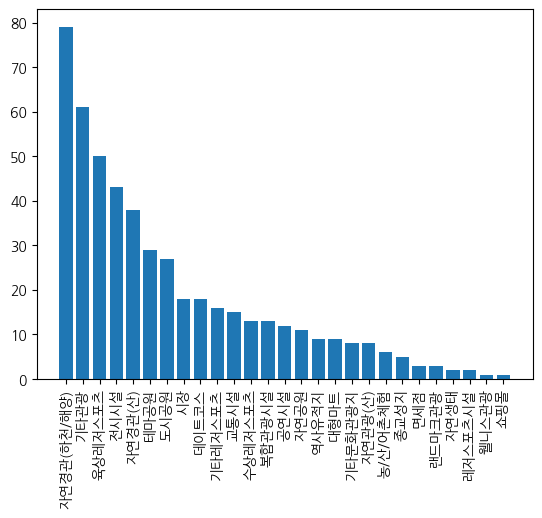

In [ ]:
plt.bar(low_cat.index, low_cat)
plt.xticks(rotation=90)
plt.show()

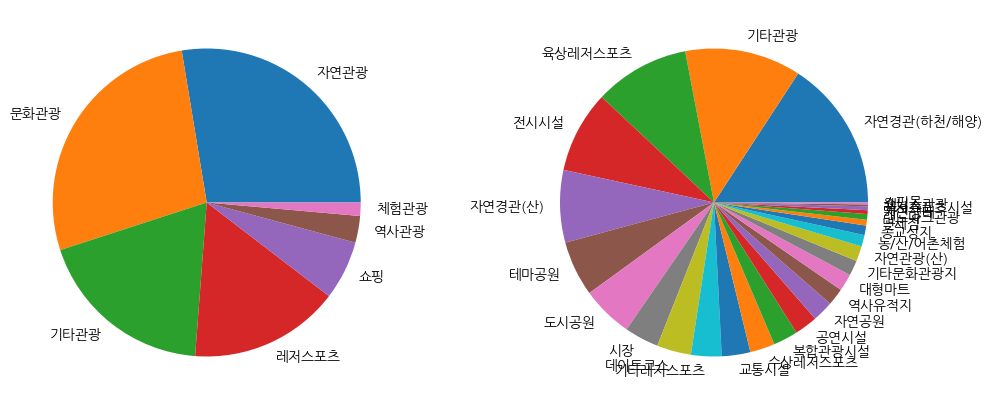

In [162]:
# pie chart : 전체에서 부분이 어느정도 차지하고 있는지

plt.figure(figsize=(12, 5))
# 중분류
plt.subplot(1,2,1)
plt.pie(mid_cat, labels=mid_cat.index)

# 소분류
plt.subplot(1,2,2)
plt.pie(low_cat, labels=low_cat.index)
plt.show()

In [163]:
# 소분류 카테고리 - 상위 10개 값만 이용
top_low = low_cat.head(10) # low_cat[:10]
top_low  # 기존에 가지고 있던 데이터셋 기준이 아니라 새롭게 정렬 -> 조건이 될 수 없음

자연경관(하천/해양)    79
기타관광           61
육상레저스포츠        50
전시시설           43
자연경관(산)        38
테마공원           29
도시공원           27
시장             18
데이트코스          18
기타레저스포츠        16
Name: 소분류 카테고리, dtype: int64

In [164]:
# place 데이터 프레임에서 소분류 상위 10개 값
# low_cat 값들 기준 -> 원래 데이터에서 해당하는 소분류 카테고리를 뽑아오기
place[place["소분류 카테고리"].isin(top_low.index)]

,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,,
2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
6,협재해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
...,...,...,...,...,...,...,...
491,새미은총의동산,제주특별자치도,제주시,제주 제주시,문화관광,도시공원,1936
492,금능해안도로,제주특별자치도,제주시,제주 제주시,기타관광,데이트코스,1923
495,조천만세동산,제주특별자치도,제주시,제주 제주시,문화관광,도시공원,1913


### 소분류 카테고리 중 자연경관 탐색

In [165]:
nature = place[place['소분류 카테고리']=='자연경관(하천/해양)']
nature.head()

,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,,
4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
6,협재해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
7,이호테우해변,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970
10,곽지해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702
22,김녕해수욕장,제주특별자치도,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488


In [ ]:
# 자연경관에 대한 검색건수
nature['검색건수'].sum()

1742995

### 자연경관 중 해수욕장(해변) 데이터로 정제

In [ ]:
nature['관광지명'].unique() # nature 자연 경관 -> 바다에 관련된 정보

array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '성산항', '광치기해변', '사계해수욕장', '세화해수욕장',
       '운진항', '판포포구', '모슬포항', '제주항제6부두', '삼양해수욕장', '제주항제4부두', '애월항',
       '황우지해안', '화순금모래해변', '법환포구', '한담해변', '하우목동항', '한림항', '홍조단괴해빈',
       '논짓물', '검멀레해수욕장', '도두항', '천진항', '구엄리돌염전', '서귀포항', '위미항', '하도해수욕장',
       '평대리해수욕장', '신양섭지해수욕장', '코난비치', '비양도', '오조포구', '제주항제2부두', '제주항제3부두',
       '보목포구', '신창풍차해안', '가파도', '화순항', '하고수동해수욕장', '대평포구', '사계항', '차귀도',
       '신도포구', '강정포구', '코난해변', '용수리포구', '제주항제9부두', '월령포구', '자구내포구',
       '구엄포구', '종달리해변', '제주항제7부두', '하모해수욕장', '세기알해변', '고내포구', '차귀도포구',
       '쇠소깍해변', '월평포구', '대포포구', '남원포구', '신흥해수욕장', '영락리방파제', '용담포구',
       '소금막해변', '수산저수지', '신창항', '하효항', '구두미포구', '제주항', '김녕포구', '동일리포구'],
      dtype=object)

In [ ]:
# 관광지 초점 -> 항구, 포구, 염전, 부두, 저수지 .. 제외 -> 해수욕장

# '항' 삭제
nature = nature.drop(labels=nature[nature['관광지명'].str[-1]=='항'].index, axis=0)
# '포구' 삭제
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:]=='포구'].index, axis=0)
# 부두 
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:]=='부두'].index, axis=0)
# 염전 
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:]=='염전'].index, axis=0)
# 저수지
nature = nature.drop(labels=nature[nature['관광지명'].str[-3:]=='저수지'].index, axis=0)
# 방파제
nature = nature.drop(labels=nature[nature['관광지명'].str[-3:]=='방파제'].index, axis=0)

nature['관광지명'].unique()

array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '광치기해변', '사계해수욕장', '세화해수욕장', '삼양해수욕장',
       '황우지해안', '화순금모래해변', '한담해변', '홍조단괴해빈', '논짓물', '검멀레해수욕장', '하도해수욕장',
       '평대리해수욕장', '신양섭지해수욕장', '코난비치', '비양도', '신창풍차해안', '가파도', '하고수동해수욕장',
       '차귀도', '코난해변', '종달리해변', '하모해수욕장', '세기알해변', '쇠소깍해변', '신흥해수욕장',
       '소금막해변'], dtype=object)

In [ ]:
# 해수욕장만 찾기 
nature_beach = nature['관광지명'].str.contains('해수욕장')
nature[nature_beach]['관광지명'].unique()

array(['함덕해수욕장', '협재해수욕장', '곽지해수욕장', '김녕해수욕장', '금능해수욕장', '표선해수욕장',
       '사계해수욕장', '세화해수욕장', '삼양해수욕장', '검멀레해수욕장', '하도해수욕장', '평대리해수욕장',
       '신양섭지해수욕장', '하고수동해수욕장', '하모해수욕장', '신흥해수욕장'], dtype=object)

In [ ]:
nature.describe()

,검색건수
count,35.000000
mean,37293.314286
std,50415.449007
min,2751.000000
25%,6737.000000
50%,13206.000000
75%,53093.000000
max,195477.000000


### 해수욕장 데이터 중 검색량의 이상치 판별
- 혼잡도로 표현

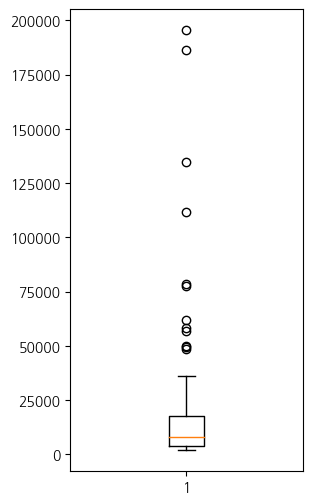

In [176]:
# (q1, q2, q3 * 1.5) 초과: 이상치 -> 검색량이 너무 많다 = 혼잡도가 높다
plt.figure(figsize=(3, 6))
plt.boxplot(nature['검색건수'])
plt.show()

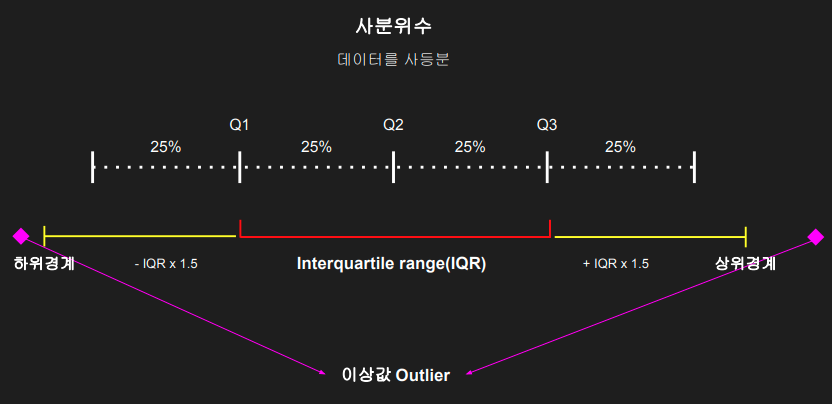

In [ ]:
# 상위 경계값 -> 혼잡도 높음
IQR = 53093 - 6737 # q3 - q1
upper_IQR = IQR * 1.5 + 53093 # q3 + IQR * 1.5
upper_IQR

122627.0

In [ ]:
import numpy as np

# 상위 경계값을 초과하는 값들을 지워줌
nature['혼잡도'] = np.where(nature['검색건수'] > upper_IQR, '혼잡', '보통')
nature.head(10)  # -> 놀수 있는 바다에 대한 순위 정보

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,혼잡도
순위,,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,혼잡
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,혼잡
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,혼잡
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,보통
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,보통
23,금능해수욕장,제주시,제주 제주시 금능길 119-10,자연관광,자연경관(하천/해양),77609,보통
29,중문색달해변,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889,보통
32,월정리해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),58431,보통
33,표선해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866,보통


### 해수욕장 데이터를 '시/군/구' 컬럼으로 비교

In [ ]:
place['시/군/구'].value_counts()

제주시     263
서귀포시    237
Name: 시/군/구, dtype: int64

In [166]:
# 제주시, 서귀포시 바다 -> groupby 대신 조건문 사용 
j = nature[nature['시/군/구']=='제주시']
j.head()

,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,,
4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
6,협재해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
7,이호테우해변,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970
10,곽지해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702
22,김녕해수욕장,제주특별자치도,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488


In [ ]:
s = nature[nature['시/군/구']=='서귀포시']
s.describe()

,검색건수
count,12.000000
mean,24095.250000
std,22979.536075
min,2751.000000
25%,6119.250000
50%,15008.500000
75%,48893.250000
max,61889.000000


In [ ]:
# groupby 사용 
groupby_city = nature.groupby('시/군/구')['검색건수'].sum()
groupby_city

시/군/구
서귀포시     289143
제주시     1016123
Name: 검색건수, dtype: int64

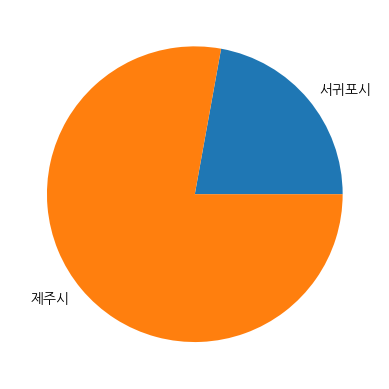

In [ ]:
# nature 검색수 안에서 제주시/서귀포시가 어느정도 검색량을 차지하고 있는지 
plt.pie(groupby_city, labels=['서귀포시', '제주시'])
plt.show()

## 코로나 지역별 데이터

In [7]:
region = pd.read_csv('region.csv')
region.head()

,day,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
0,2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
1,2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2,2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
3,2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
4,2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [ ]:
region.shape

(32, 20)

In [8]:
region = region.set_index('day')
region.tail()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
day,,,,,,,,,,,,,,,,,,,
2020-03-28,390,114,6587,51,20,31,39,44,433,32,41,126,10,8,1285,91,8,168,9478
2020-03-29,410,117,6610,58,20,34,39,46,448,34,41,127,12,9,1287,94,8,189,9583
2020-03-30,426,118,6624,58,20,34,39,46,463,36,44,127,13,9,1298,95,9,202,9661
2020-03-31,450,119,6684,64,20,36,39,46,476,36,44,128,13,9,1300,96,9,217,9786
2020-04-01,474,122,6704,69,24,36,39,46,499,38,44,131,14,12,1302,100,9,224,9887


In [ ]:
region.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      32 non-null     int64
 1   부산      32 non-null     int64
 2   대구      32 non-null     int64
 3   인천      32 non-null     int64
 4   광주      32 non-null     int64
 5   대전      32 non-null     int64
 6   울산      32 non-null     int64
 7   세종      32 non-null     int64
 8   경기      32 non-null     int64
 9   강원      32 non-null     int64
 10  충북      32 non-null     int64
 11  충남      32 non-null     int64
 12  전북      32 non-null     int64
 13  전남      32 non-null     int64
 14  경북      32 non-null     int64
 15  경남      32 non-null     int64
 16  제주      32 non-null     int64
 17  검역      32 non-null     int64
 18  총확진자수   32 non-null     int64
dtypes: int64(19)
memory usage: 5.0+ KB


In [9]:
# Index -> DatetimeIndex
region.index = pd.to_datetime(region.index, format='%Y-%m-%')
region.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      32 non-null     int64
 1   부산      32 non-null     int64
 2   대구      32 non-null     int64
 3   인천      32 non-null     int64
 4   광주      32 non-null     int64
 5   대전      32 non-null     int64
 6   울산      32 non-null     int64
 7   세종      32 non-null     int64
 8   경기      32 non-null     int64
 9   강원      32 non-null     int64
 10  충북      32 non-null     int64
 11  충남      32 non-null     int64
 12  전북      32 non-null     int64
 13  전남      32 non-null     int64
 14  경북      32 non-null     int64
 15  경남      32 non-null     int64
 16  제주      32 non-null     int64
 17  검역      32 non-null     int64
 18  총확진자수   32 non-null     int64
dtypes: int64(19)
memory usage: 5.0 KB


In [ ]:
region.isnull().sum()

서울       0
부산       0
대구       0
인천       0
광주       0
대전       0
울산       0
세종       0
경기       0
강원       0
충북       0
충남       0
전북       0
전남       0
경북       0
경남       0
제주       0
검역       0
총확진자수    0
dtype: int64

### '지역'과 '총확진자수'로 데이터 분리하기

In [172]:
region.loc['2020-03-01':'2020-03-03'] # 레이블 값 - 행 기준
# region['2020-03-01':'2020-03-03']

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
day,,,,,,,,,,,,,,,,,,,
2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812


In [174]:
region.iloc[0:3, 1:4] # 인덱스 값 
# region[0:3]

,부산,대구,인천
day,,,
2020-03-01,81,2569,6
2020-03-02,88,3081,7
2020-03-03,90,3601,7


In [ ]:
# 전국 확진자수 
total = region.loc[:, '총확진자수']
total.head()

day
2020-03-01    3526
2020-03-02    4212
2020-03-03    4812
2020-03-04    5328
2020-03-05    5766
Name: 총확진자수, dtype: int64

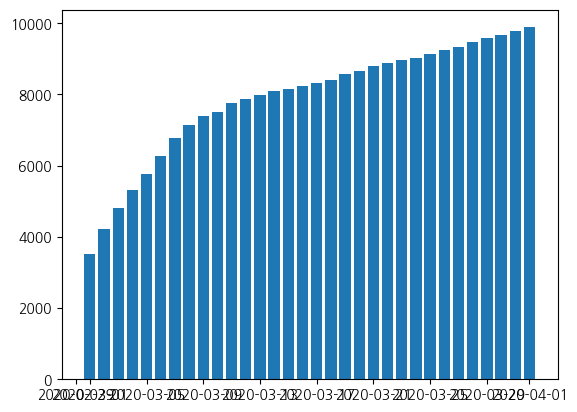

In [ ]:
# bar graph
plt.bar(total.index, total)
plt.show()

In [ ]:
region.columns[:-1]

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '검역'],
      dtype='object')

In [ ]:
cities = region.loc[:, region.columns[:-1]]
cities.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
day,,,,,,,,,,,,,,,,,,
2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0
2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0
2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0
2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0
2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0


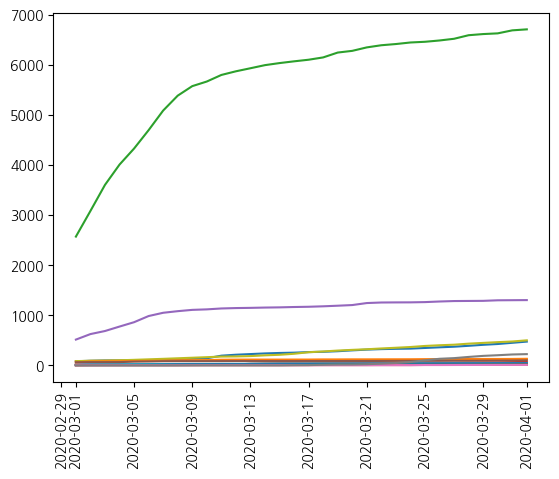

'\n그래프가 식별이 잘 되지 않을 때,\n그래프의 범위를 바꿔주거나 or 그래프를 사용\n'

In [ ]:
# 지역별 그래프 -> 지역(y)만 다르고 인덱스(x) 동일
# 하나의 영역 안에 여러 그래프

plt.plot(cities)
# plt.plot(cities['부산'])
plt.xticks(rotation=90)
plt.show()
'''
그래프가 식별이 잘 되지 않을 때,
그래프의 범위를 바꿔주거나 or 그래프를 사용
'''

In [ ]:
cities.columns

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '검역'],
      dtype='object')

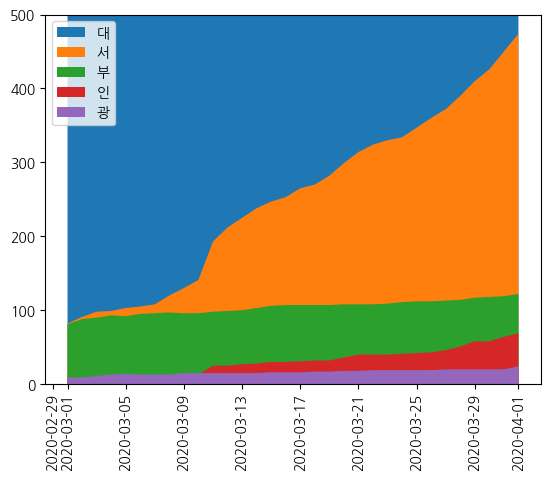

In [ ]:
# 시간 흐름에 따른 확진자 수 누적 그래프
y2 = cities['대구']
y1 = cities['서울']
y3 = cities['부산']
y4 = cities['인천']
y5 = cities['광주']

# 누적 그래프 -> 어떤 게 누적될 것인지 -> 시간 순에 따라 정렬
# 쌓이는 방향, 시간순에 따라 쌓이는 부분 -> 각 지역별 데이터마다 누적 확인
plt.stackplot(cities.index, y2, labels='대구')
plt.stackplot(cities.index, y1, labels='서울')
plt.stackplot(cities.index, y3, labels='부산')
plt.stackplot(cities.index, y4, labels='인천')
plt.stackplot(cities.index, y5, labels='광주')
# plt.stackplot(cities.index, y1, y2, y3, y4, y5) # 잘못됨

# 그래프 범위 설정
plt.ylim([0, 500])
# plt.axis([x최소, x최대, y최소, y최대])

plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

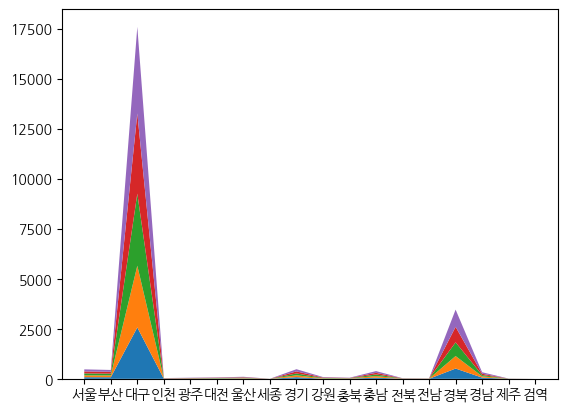

In [ ]:
# 지역별 누적 그래프
plt.stackplot(cities.columns, cities.iloc[:5])
# plt.stackplot(cities.columns, cities)
# plt.stackplot(cities.columns[:5], cities.loc[:, cities.columns[:5]])
plt.show()

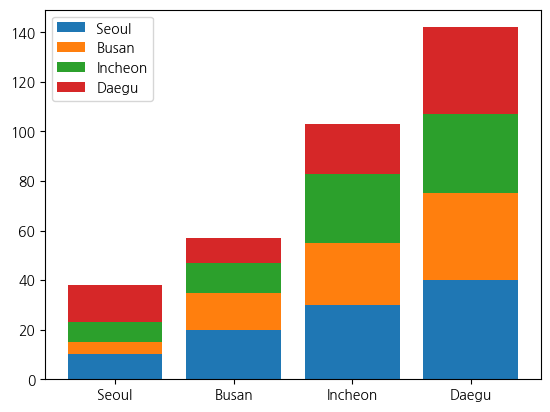

In [ ]:
# 데이터 예시
cities1 = ['Seoul', 'Busan', 'Incheon', 'Daegu']
data = [[10, 20, 30, 40], [5, 15, 25, 35], [8, 12, 28, 32], [15, 10, 20, 35]]

# 누적 막대 그래프 생성
fig, ax = plt.subplots()
bottom = None
for i in range(len(cities1)):
    ax.bar(cities1, data[i], bottom=bottom, label=cities1[i])
    if bottom is None:
        bottom = data[i]
    else:
        bottom = [bottom[j] + data[i][j] for j in range(len(bottom))]

ax.legend()
plt.show()

- 변화폭을 민감하게 살펴보자
 - 마스크 해지 -> 감염이 얼마나 증가/감소
 - 코로나, 폐렴, 독감

In [1]:
# datetime의 경우 matplotlib.dates의 mdates 모듈이 추가로 필요합니다.
import matplotlib.dates as mdates

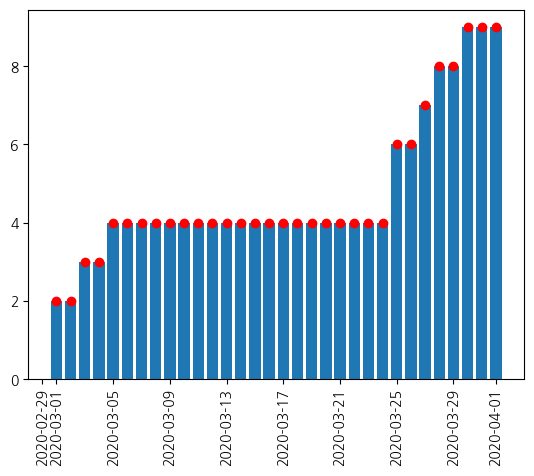

In [ ]:
# 제주 지역 확진자
jeju = region['제주']

# 데이터 시각화 -> 어떤 구간에 (큰)변화가 있는지
plt.bar(jeju.index, jeju)
plt.plot(jeju, 'or')

# annotation
# plt.annotate('변화', xy=(x, y), xytext=(), xrrowprops=())
plt.annotate('변화', xy=(25, 6), xytext=('25일', '6'), arrowprops={'color': 'green'})

plt.xticks(rotation=90)
plt.show() 

### 각 지역을 위도/경도로 표현

In [ ]:
# 코로나 지역별 데이터
# 지역명 -> 실제 좌표의 위치
# 좌표 데이터 -> 위도=latitude, 경도=longtitude
loc = {
    '서울' : [37.566418, 126.977950],  #서울시청
    '부산' : [35.180152, 129.074980],  #부산시청
    '대구' : [35.871468, 128.601757],  #대구시청
    '인천' : [37.456445, 126.705873],  #인천시청
    '광주' : [35.160068, 126.851426],  #광주광역시청
    '대전' : [36.350664, 127.384819],  #대전시청
    '울산' : [35.539772, 129.311486],  #울산시청
    '세종' : [36.480838, 127.289181],  #세종시청
    '경기' : [37.275221, 127.009382],  #경기도청
    '강원' : [37.885300, 127.729835],  #강원(강원도청)
    '충북' : [36.635947, 127.491345],  #충북도청
    '충남' : [36.658826, 126.672849],  #충남도청
    '전북' : [35.820599, 127.108759],  #전북도청
    '전남' : [34.816351, 126.462924],  #전남도청
    '경북' : [36.574108, 128.509303],  #경북도청
    '경남' : [35.238398, 128.692371],  #경남도청
    '제주' : [33.3617007, 126.511657]  #제주
}
type(loc)

dict

In [ ]:
loc = pd.DataFrame(loc).T  # T -> 행렬 모양 바꿈

In [ ]:
loc.columns = ['lat', 'lon']
loc

,lat,lon
서울,37.566418,126.977950
부산,35.180152,129.074980
대구,35.871468,128.601757
인천,37.456445,126.705873
광주,35.160068,126.851426
대전,36.350664,127.384819
울산,35.539772,129.311486
세종,36.480838,127.289181
경기,37.275221,127.009382
강원,37.885300,127.729835


In [ ]:
jeju_l = list(loc.loc['제주'])

In [ ]:
# 지도 관련 라이브러리
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

map_osm = folium.Map(location=jeju_l, zoom_start=7)
map_osm

In [ ]:
# 지도 위에 해당하는 지역의 확진자수를 표시
from folium.plugins import MarkerCluster

# 마커 클러스터 사용을 위한 선언
marker_cluster = MarkerCluster().add_to(map_osm)

folium.Marker(jeju_l, popup=jeju_l, icon=folium.Icon(color='red', icon='start')).add_to(marker_cluster)
map_osm

In [ ]:
loc.index

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주'],
      dtype='object')

In [ ]:
# 각 지역별로 마커 찍기 -> 자습시간

# 지역별 확진자 합 (데이터 프레임)
# for r in loc.columns:
#     folium.Marker(list(loc[r]), popup=list(loc[r]), 
#                   icon=folium.Icon(color='red', icon='start')).add_to(marker_cluster)
# map_osm

## 코로나 한국 데이터

In [ ]:
kr = pd.read_csv('total_.csv')
kr.head()

,date,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
0,2020-03-01,96985,3526,30,3479,17,32422,61037
1,2020-03-02,109591,4212,31,4159,22,33799,71580
2,2020-03-03,125851,4812,34,4750,28,35555,85484
3,2020-03-04,136707,5328,41,5255,32,28414,102965
4,2020-03-05,146541,5766,88,5643,35,21810,118965


In [ ]:
kr.set_index('date', inplace=True)
kr.tail()

,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
date,,,,,,,
2020-03-28,387925,9478,4811,4523,144,16564,361883
2020-03-29,394141,9583,5033,4398,152,15028,369530
2020-03-30,395194,9661,5228,4275,158,13531,372002
2020-03-31,410564,9786,5408,4216,162,16892,383886
2020-04-01,421547,9887,5567,4155,165,16585,395075


In [ ]:
kr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   총계      32 non-null     int64
 1   확진자     32 non-null     int64
 2   격리해제    32 non-null     int64
 3   격리중     32 non-null     int64
 4   사망      32 non-null     int64
 5   검사중     32 non-null     int64
 6   결과 음성   32 non-null     int64
dtypes: int64(7)
memory usage: 2.0+ KB


In [ ]:
kr.index = pd.to_datetime(kr.index, format='%Y-%m-%d')
kr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   총계      32 non-null     int64
 1   확진자     32 non-null     int64
 2   격리해제    32 non-null     int64
 3   격리중     32 non-null     int64
 4   사망      32 non-null     int64
 5   검사중     32 non-null     int64
 6   결과 음성   32 non-null     int64
dtypes: int64(7)
memory usage: 2.0 KB


In [ ]:
kr.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1],
           dtype='int64', name='date')

In [ ]:
kr.isnull().sum()

총계       0
확진자      0
격리해제     0
격리중      0
사망       0
검사중      0
결과 음성    0
dtype: int64

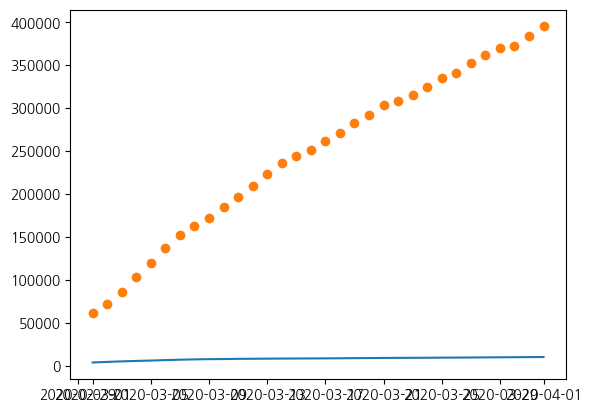

In [ ]:
# 데이터 타입들 중 컬럼들이 서로 상관성/반대 성향이 있으면 비교해야 함 
pos = kr['확진자']  # 확진자(양성)
neg = kr['결과 음성']

plt.plot(pos)
plt.plot(neg, 'o')

plt.show()

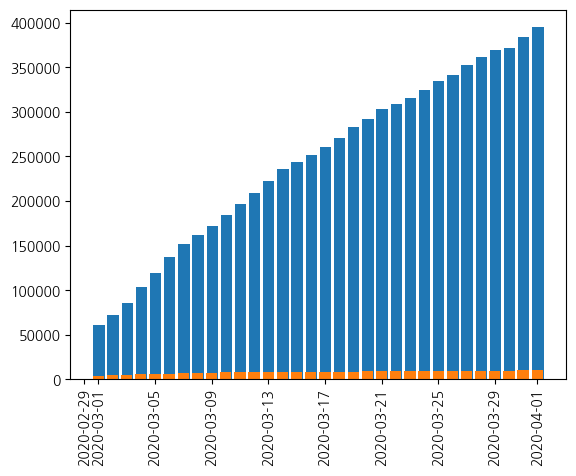

In [ ]:
# 양성 음성 -> 상반되는 데이터
# 가로(x):시간,  세로(y): 수
# 가로: 비교할 데이터 -> 양성, 음성
# 추가 설명: index(datetime) + timedelta

# np.timedelta64(시간, ('h','m','s'))
w = np.timedelta64(60, 'm')

plt.xticks(rotation=90)
plt.bar(neg.index + w, neg)
plt.bar(pos.index, pos)

plt.show()

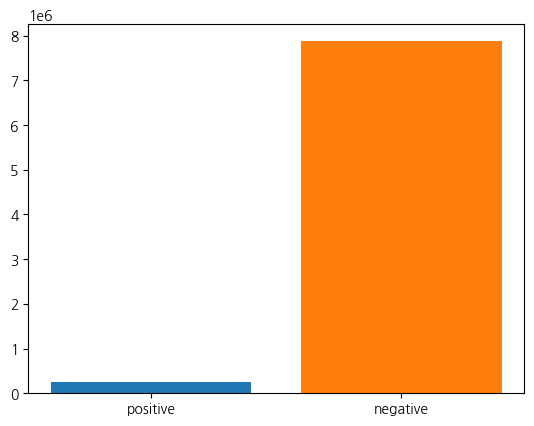

In [ ]:
# 양성(총 합), 음성(총 합)
sum_p = pos.sum()
sum_n = neg.sum()

plt.bar('positive', sum_p)
plt.bar('negative', sum_n)
plt.show()
# 비교되는 두 가지 값은 한 눈에 시각적으로 들어오도록 

-> 어떻게 정리해야 왜곡이 되지 않고 시각적으로 효율적인지

### 사망률/완치율 구하기

In [ ]:
# 두 컬럼을 합쳐서 하나의 결과 도출 -> 컬럼 선택 
# 확진자 수 중 사망 -> 사망률, 치명률
death = kr['사망'] 
d_p = round((death / pos) * 100, 2)
d_p.head()

date
2020-03-01    0.48
2020-03-02    0.52
2020-03-03    0.58
2020-03-04    0.60
2020-03-05    0.61
dtype: float64

In [ ]:
# 확진자 수 중 격리해제 -> 완치율
rec = kr['격리해제'] 
r_p = round((rec / pos) * 100, 2)
r_p.head()

date
2020-03-01    0.85
2020-03-02    0.74
2020-03-03    0.71
2020-03-04    0.77
2020-03-05    1.53
dtype: float64

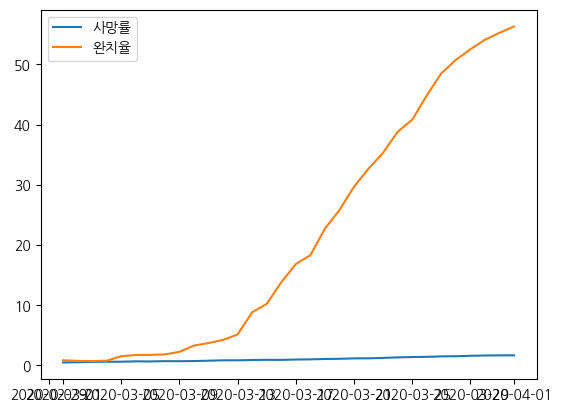

In [ ]:
# 사망률, 완치율 -> 파이 차트 
plt.plot(d_p, label='사망률')
plt.plot(r_p, label='완치율')
plt.legend()
plt.show()
# 완치율이 유의미하게(눈에 띄게) 증가 

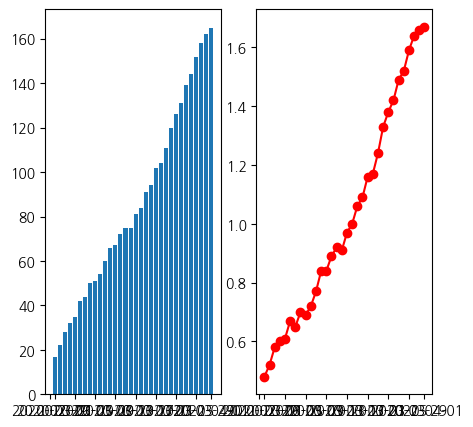

In [ ]:
plt.figure(figsize=(5, 5))
plt.subplot(1,2,1) 
plt.bar(death.index, death) # 사망자 수
plt.subplot(1,2,2)
plt.plot(d_p.index, d_p, 'o-r') # 사망률
plt.show()

### 전체-부분 경향성 파악

In [ ]:
# 전체 - 부분
# 어떤 값이 전체에서 어느 정도 차지하고 있는지

# 시계열 -> 변화, 흐름
# 1. 경향(성)
# 2. 비율 -> 시간의 흐름에 따라 특정한 부분이 얼마나 영향을 끼치고 있는지

# 확진자 중 사망자, 완치자(얼마나) 발생했는지 : 일별
# 격리중, 격리해제 비율
# 검사 중 양성, 음성 판정 비율
# 주말 전후 양성 비율 변화
# 주말 전후 검사량 변화

# 총계	확진자	격리해제	격리중	사망	검사중	결과 음성

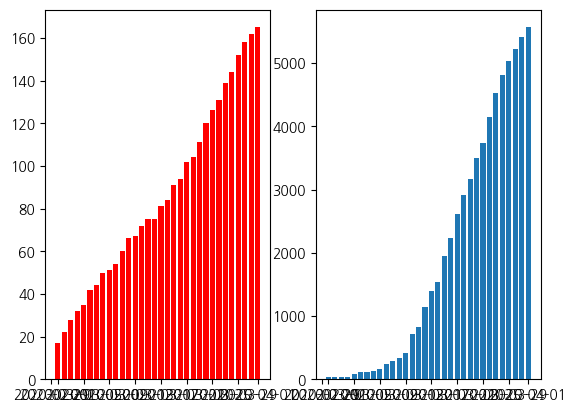

In [ ]:
# 확진자 중 사망자, 완치자(얼마나) 발생했는지 : 일별
plt.subplot(1, 2, 1)
plt.bar(death.index, death, color='r') # 대체적으로 완만하게 
plt.subplot(1, 2, 2)
plt.bar(rec.index, rec) # 어느 순간 가파르게 
plt.show()

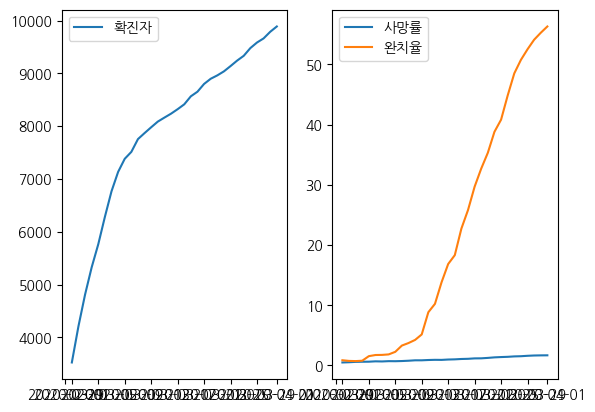

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(pos.index, pos, label='확진자') # 확진자 
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(d_p, label='사망률')
plt.plot(r_p, label='완치율')
# 두 데이터(비율) 모두 확진자 수를 기준으로 이루어짐 
plt.legend()

plt.show()

# 확진자는 계속 증가한다 / 사망, 격리해제도 계속 증가한다
# 확진자가 증가하는 경향 & 완치자(격리해제)가 증가하는 경향이 훨씬 유사하다